In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
full_data = pd.read_csv('coffee_dataset.csv')


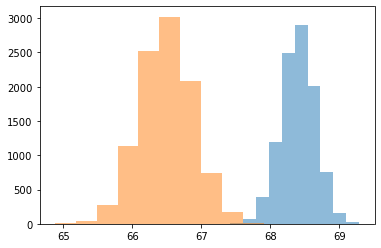

In [2]:
sample_data = full_data.sample(200)
# 1. Lets bootstrap using a subset of the data and note down means for coffee and non-coffee drinkers, as well as the differences in both.
means = []
no_coffee_means = []
coffee_means = []
for _ in range (10000):
    bootstrap = sample_data.sample(200, replace=True)
    coffeemean = bootstrap[bootstrap.drinks_coffee == True].height.mean()
    nocoffeemean = bootstrap[bootstrap.drinks_coffee == False] .height.mean()
    no_coffee_means.append(nocoffeemean)
    coffee_means.append(coffeemean)
    means.append(coffeemean - nocoffeemean)
#Lets plot this
plt.hist(coffee_means, alpha=0.5);
plt.hist(no_coffee_means, alpha=0.5);

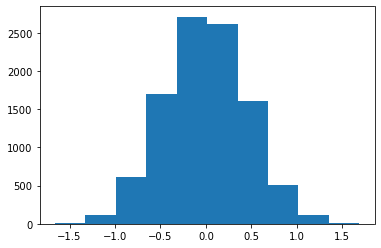

In [3]:
# 2. Lets' pick samples from the null.
null_val = np.random.normal(0, np.std(means), 10000)
plt.hist(null_val);

In [8]:
# 3. Lets compare! Since our alternate hypothesis was: H1: Average height for coffee drinkers != Average height for non-coffee drinkers
#well test to see what proportion of the samples from #(2) are not equal to our sample mean.
(null_val != means).mean()

1.0

In [12]:
(null_val - means)

array([-1.91631948, -2.85307726, -2.0683286 , ..., -1.17055669,
       -2.21849829, -2.41592039])

In [18]:
data = pd.read_csv('base-and-final.csv')

(array([  11.,   94.,  495., 1542., 2828., 2828., 1574.,  522.,   98.,
           8.]),
 array([-0.961   , -0.769085, -0.57717 , -0.385255, -0.19334 , -0.001425,
         0.19049 ,  0.382405,  0.57432 ,  0.766235,  0.95815 ]),
 <a list of 10 Patch objects>)

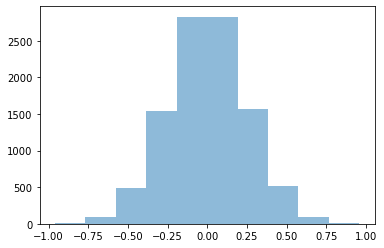

In [32]:
mean_deltas = []

base_means = []
improved_means = []

for _ in range (10000):
    bootstrap = data.sample(40, replace=True)
    
    base_mean = bootstrap[0:20].F1.mean()
    improved_mean = bootstrap[20:40].F1.mean()
    
    base_means.append(base_mean)
    improved_means.append(improved_mean)
    
    mean_delta = improved_mean - base_mean

    mean_deltas.append(mean_delta)

#Lets plot this
#plt.hist(improved_means, alpha=0.5);
#plt.hist(base_means, alpha=0.5);
plt.hist(mean_deltas, alpha=0.5)

In [33]:
len(mean_deltas)

10000

In [38]:
len([delta for delta in mean_deltas if delta > 0.8])/10000

0.0002